# Adding Various Columns with Functions

In the previous section we created an advanced analysis with _merge_ and _groupby_ and other Pandas capabilities, which are harder to do in Excel. In this section, we will check the more traditional functions that are often used in Excel spreadsheet and we will see how to use them easily in Pandas.

## Loading Data

As usual, let's load a dataset to work on. We will take another dataset that is used in machine learning education, "Bike Share". This is a data set about the demand of bike share service in Seoul. Please note that we need to modify the default encoding of _read_csv_ from 'UTF-8' to 'latin1'.

In [1]:
import pandas as pd

bike_share_data = (
    pd
    .read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', 
        encoding='latin1'
    )
)
bike_share_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


You can see that the data includes columns such as _Seasons_ or _Functioning Day_, however, we might want to calculate such columns differently.

## Date Columns

We will start with creating a few columns based on the date column, such as day of the week and month. 
* Start with the table we loaded above
* Make sure that the Date column is in datetime format that we see (note the day before the month)
* Calculate the day-of-week (DOW) of each row (to use the built-in functions we need to access the date accessor (_.dt_))
* Calculate the month value of each row

In [2]:
enriched_bike_share_data = (
    bike_share_data
    .assign(Date = pd.to_datetime(bike_share_data.Date, format='%d/%m/%Y', errors='coerce'))
    .assign(DOW = lambda x : x.Date.dt.dayofweek)
    .assign(month = lambda x : x.Date.dt.month)
)
enriched_bike_share_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DOW,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11


## Simple Data Visulizations

* Start with the enriched table above
* Group the data by date column
* Calculate the mean of values per each day
* Plot the results with date as x and number of rented bike as y

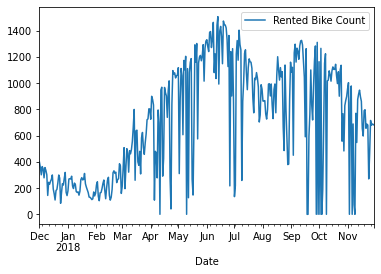

In [3]:
(
    enriched_bike_share_data
    .groupby('Date')
    .mean()
    .plot(y='Rented Bike Count')
);

* Start with the enriched table above
* Group the data by date column
* Calculate the mean of values per each day
* Plot the results 
* with scatter plot with temp as x and number of rented bike as y

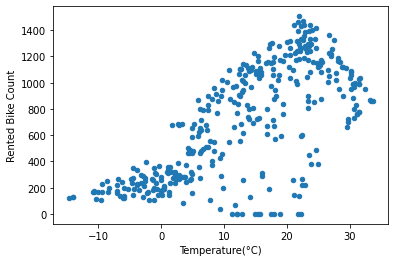

In [4]:
(
    enriched_bike_share_data
    .groupby('Date')
    .mean()
    .plot
    .scatter(x='Temperature(°C)', y='Rented Bike Count')
);

* Start with the enriched table above
* Group the data by date column
* Calculate the mean of values per each day
* Calculate the correlation values between the numeric values
* Take the values that are related to the first column (_Rented Bike Count_)
* Add style to the output
* Highlight the maximum correlation value with green background
* and Highlight the minimum correlation value with red background

In [8]:
(
    enriched_bike_share_data
    .groupby('Date')
    .mean()
    .corr()
    .iloc[2:,[0]]
    .style
    .highlight_max(color='green')
    .highlight_min(color='red')
)

,Rented Bike Count
Temperature(°C),0.699824
Humidity(%),0.028158
Wind speed (m/s),-0.174859
Visibility (10m),0.145376
Dew point temperature(°C),0.602648
Solar Radiation (MJ/m2),0.684069
Rainfall(mm),-0.214252
Snowfall (cm),-0.240836
DOW,-0.044357
month,0.201733


We can see that the higher correlation is with the temperature (the higher the temperature, the more bikes are rented), and with the Snowfall (the more snowfall, the fewer bikes are reneted), which make sense. 